In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
train_data = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
test_data = pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")

print(train_data.shape) #60000, 785 => label, 784 pixel (28*28)
print(test_data.shape) #10000, 785 => label, 784 pixel

print(train_data.head(5))
print(test_data.head(5))

(60000, 785)
(10000, 785)
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0   

In [3]:
#reshape
import numpy as np

train_x = train_data.drop(['label'], axis = 1)
train_y = train_data['label']

test_x = test_data.drop(['label'], axis = 1)
test_y = test_data['label']

train_x = train_x.values.reshape(-1, 28, 28, 1)
test_x = test_x.values.reshape(-1, 28, 28, 1)

max = np.max(train_x)

#Normalize
train_x = train_x / max
test_x = test_x / max

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback

class cb(Callback) :
    def on_epoch_end(self, epoch, logs = {}) :
        if(logs.get('loss') < 0.001) :
            self.model.stop_training = True

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), padding='same'))
model.add(MaxPool2D((2,2))) #14
model.add(Conv2D(128, (3,3), padding='same'))
model.add(MaxPool2D((2,2))) #7
model.add(Conv2D(256, (3,3), padding='same'))
model.add(MaxPool2D((2,2))) #3
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

n_epoch = 100
with tf.device('/gpu:0') :
    model.fit(train_x, train_y, validation_data = (test_x, test_y), verbose = 1,epochs = n_epoch,
              callbacks = [cb()], batch_size = 1000)

Epoch 1/100
60/60 [==============================] - 5s 34ms/step - loss: 1.0885 - accuracy: 0.6283 - val_loss: 0.4403 - val_accuracy: 0.8449
Epoch 2/100
60/60 [==============================] - 2s 26ms/step - loss: 0.4146 - accuracy: 0.8516 - val_loss: 0.3556 - val_accuracy: 0.8714
Epoch 3/100
60/60 [==============================] - 2s 25ms/step - loss: 0.3465 - accuracy: 0.8743 - val_loss: 0.3117 - val_accuracy: 0.8885
Epoch 4/100
60/60 [==============================] - 2s 25ms/step - loss: 0.2962 - accuracy: 0.8941 - val_loss: 0.2723 - val_accuracy: 0.9031
Epoch 5/100
60/60 [==============================] - 2s 26ms/step - loss: 0.2641 - accuracy: 0.9039 - val_loss: 0.2582 - val_accuracy: 0.9078
Epoch 6/100
60/60 [==============================] - 2s 25ms/step - loss: 0.2376 - accuracy: 0.9130 - val_loss: 0.2524 - val_accuracy: 0.9085
Epoch 7/100
60/60 [==============================] - 2s 25ms/step - loss: 0.2211 - accuracy: 0.9191 - val_loss: 0.2479 - val_accuracy: 0.9124
Epoch 

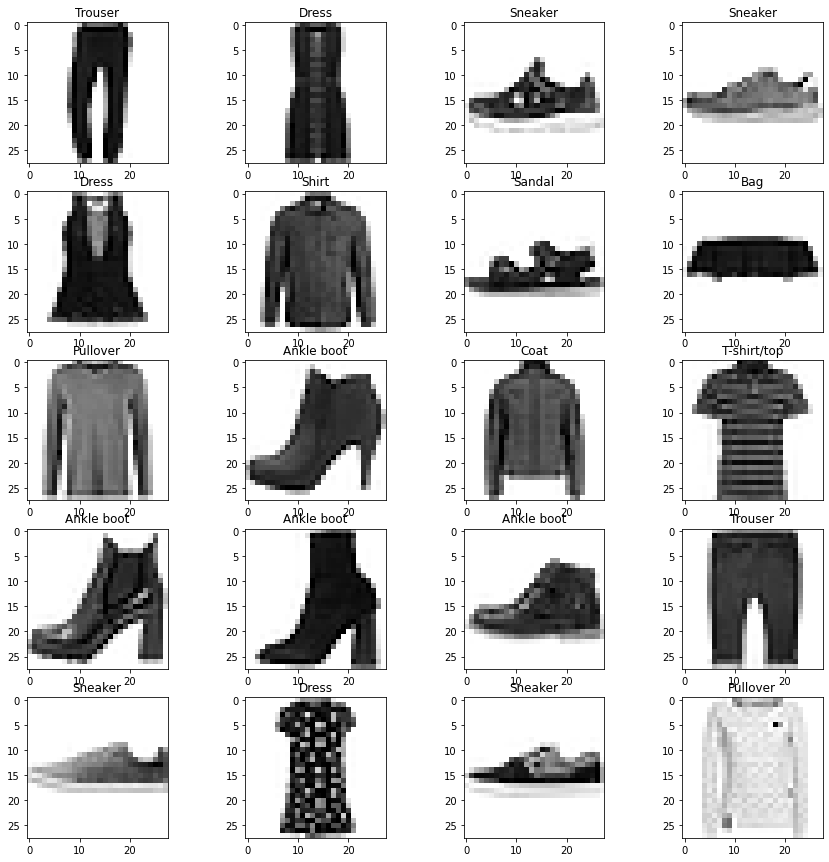

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

predict = model.predict(test_x)
predict=np.argmax(predict, axis=1)

#20 개만 뽑아서 시각화
r = random.sample(range(0, len(test_x)), 20)

fig = plt.figure(figsize = (15, 15))

fashion_list = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

for i in range(20) :
    subplot = fig.add_subplot(5, 4, i+1)
    subplot.set_title(fashion_list[predict[r[i]]])
    subplot.imshow(test_x[r[i]], cmap=plt.cm.gray_r)

plt.show()